In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math
import cmath

The Formula we're trying to emulate

![alt text](GOE_GUE_jpdf.png "Title")

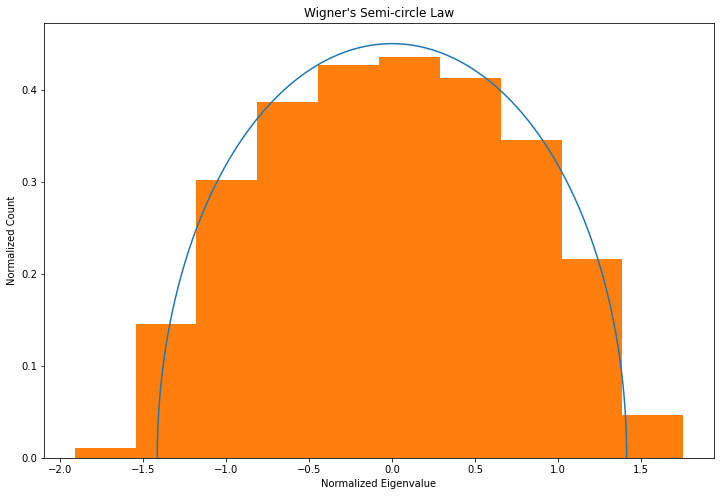

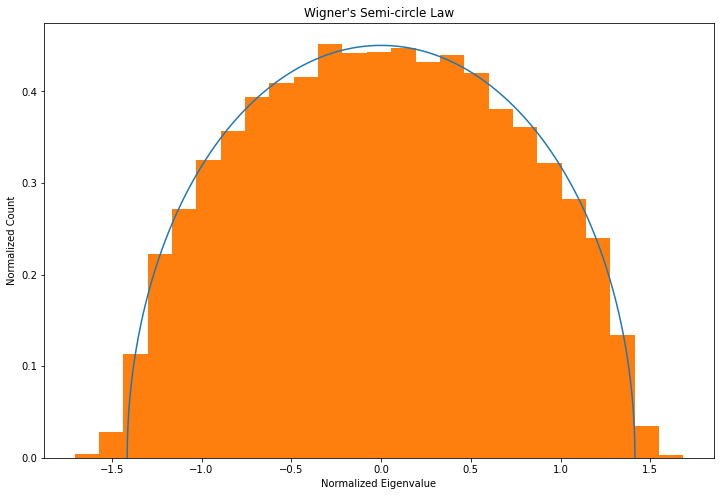

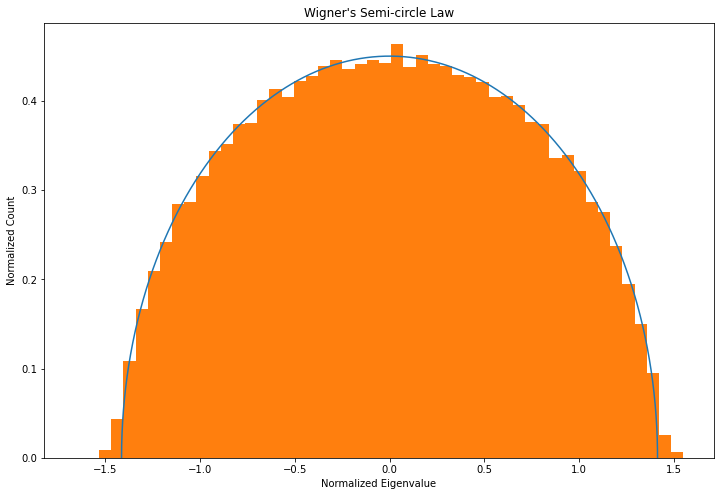

In [3]:
np.random.seed(5)
for N in [10,25,50]:
    all_eigvals = []
    for j in range(0,1000):
        mu, sigma = 0,1
        #Due to how python's sampling function works, all of these normal distributions are independent. First we make a sample 
        #GOE matrix
        rand_mat_1 = np.random.normal(mu, sigma, size=(N, N))
        rand_mat_2 = rand_mat_1.T
        sample_GOE_matrix = 0.5*(rand_mat_1 + rand_mat_2)
        eigvals = np.linalg.eigvalsh(sample_GOE_matrix)
        all_eigvals = all_eigvals + list(eigvals)
    
    all_eigvals = all_eigvals / np.sqrt(N)
    #Plotting the semicircle
    x_r = np.linspace(-np.sqrt(2),np.sqrt(2),100000)
    x = np.array(x_r)
    
    y = np.concatenate((np.array([0]), np.sqrt(2-x[1:-1]**2) / math.pi, np.array([0])), axis=0)
    plt.figure(figsize = (12,8))
    plt.plot(x, y)
    plt.hist(all_eigvals, bins = N, density = 'True')
    plt.title('Wigner\'s Semi-circle Law')
    plt.xlabel('Normalized Eigenvalue')
    plt.ylabel('Normalized Count')
    plt.savefig('Wigner_law_{}.png'.format(N))